In [1]:
import matplotlib.pyplot as plt
import numpy as np

from superfv import (
    OutputLoader,
    plot_2d_slice,
)

base_path = "/scratch/gpfs/jp7427/out/isotropic-decaying-turbulence/"

Successfully read simulation output from "/scratch/gpfs/jp7427/out/isotropic-decaying-turbulence/128x128/cupy/MM3/3revs/no_delta/rtol_1e-1/M_max_10/seed_01"


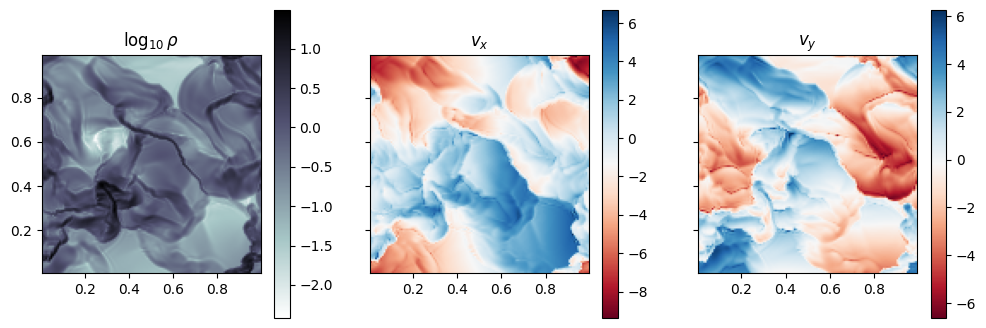

In [3]:
sim = OutputLoader(
    base_path + "128x128/cupy/MM3/3revs/no_delta/rtol_1e-1/M_max_10/seed_01"
)
# sim = OutputLoader(base_path + "128x128/cupy/ZS3/M_max_10/seed_01")

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12, 4))

axs[0].set_title(r"$\log_{10} \rho$")
axs[1].set_title(r"$v_x$")
axs[2].set_title(r"$v_y$")

t = None

plot_2d_slice(
    sim,
    axs[0],
    "rho",
    t=t,
    cell_averaged=True,
    func=lambda x: np.log10(x),
    colorbar=True,
    cmap="bone_r",
)
plot_2d_slice(sim, axs[1], "vx", t=t, cell_averaged=True, colorbar=True, cmap="RdBu")
plot_2d_slice(sim, axs[2], "vy", t=t, cell_averaged=True, colorbar=True, cmap="RdBu")

fig.savefig("map.pdf", bbox_inches="tight")

In [ ]:
fig.savefig("MUSCL-Hancock_N=64.png", dpi=300, bbox_inches="tight")

Successfully read simulation output from "/scratch/gpfs/jp7427/out/isotropic-decaying-turbulence/128x128/cupy/MUSCL-Hancock/M_max_1/seed_01"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/isotropic-decaying-turbulence/128x128/cupy/MM7/3revs/rtol_1e-3/M_max_1/seed_01"
Successfully read simulation output from "/scratch/gpfs/jp7427/out/isotropic-decaying-turbulence/128x128/cupy/MM7/3revs/rtol_1e-1/M_max_1/seed_01"


(<matplotlib.image.AxesImage at 0x150912825580>, None)

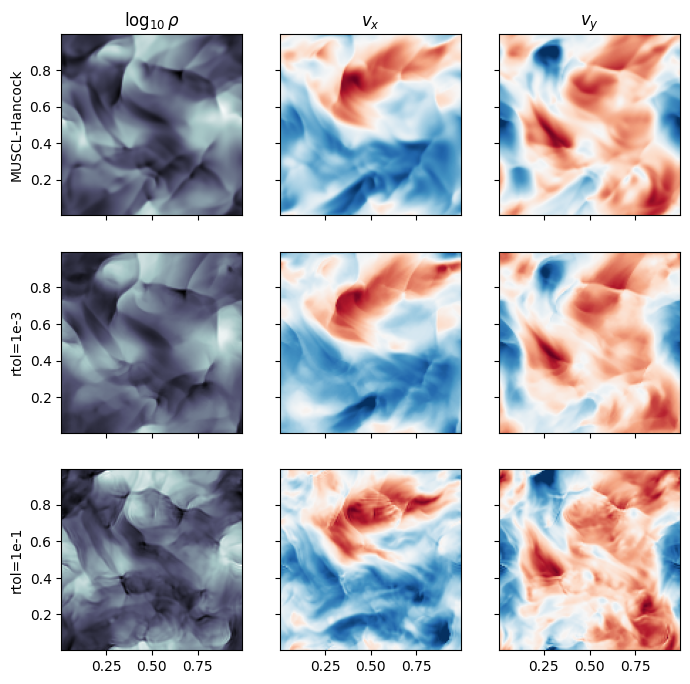

In [3]:
sim0 = OutputLoader(f"{base_path}128x128/cupy/MUSCL-Hancock/M_max_1/seed_01")
sim1 = OutputLoader(f"{base_path}128x128/cupy/MM7/3revs/rtol_1e-3/M_max_1/seed_01")
sim2 = OutputLoader(f"{base_path}128x128/cupy/MM7/3revs/rtol_1e-1/M_max_1/seed_01")

sims = [sim0, sim1, sim2]

idx = sim0.variable_index_map
rho_min = min(sim.snapshots[-1]["w"][idx("rho")].min() for sim in sims)
rho_max = min(sim.snapshots[-1]["w"][idx("rho")].max() for sim in sims)
vx_min = min(sim.snapshots[-1]["w"][idx("vx")].min() for sim in sims)
vx_max = min(sim.snapshots[-1]["w"][idx("vx")].max() for sim in sims)
vy_min = min(sim.snapshots[-1]["w"][idx("vy")].min() for sim in sims)
vy_max = min(sim.snapshots[-1]["w"][idx("vy")].max() for sim in sims)

fig, axs = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(8, 8))

axs[0, 0].set_title(r"$\log_{10} \rho$")
axs[0, 1].set_title(r"$v_x$")
axs[0, 2].set_title(r"$v_y$")

axs[0, 0].set_ylabel("MUSCL-Hancock")
axs[1, 0].set_ylabel("rtol=1e-3")
axs[2, 0].set_ylabel("rtol=1e-1")

rho_style = dict(
    cell_averaged=True,
    func=lambda x: np.log10(x),
    vmin=np.log10(rho_min),
    vmax=np.log10(rho_max),
    cmap="bone_r",
)
vx_style = dict(cell_averaged=True, vmin=vx_min, vmax=vx_max, cmap="RdBu")
vy_style = dict(cell_averaged=True, vmin=vy_min, vmax=vy_max, cmap="RdBu")

plot_2d_slice(sim0, axs[0, 0], "rho", **rho_style)
plot_2d_slice(sim0, axs[0, 1], "vx", **vx_style)
plot_2d_slice(sim0, axs[0, 2], "vy", **vy_style)

plot_2d_slice(sim1, axs[1, 0], "rho", **rho_style)
plot_2d_slice(sim1, axs[1, 1], "vx", **vx_style)
plot_2d_slice(sim1, axs[1, 2], "vy", **vy_style)

plot_2d_slice(sim2, axs[2, 0], "rho", **rho_style)
plot_2d_slice(sim2, axs[2, 1], "vx", **vx_style)
plot_2d_slice(sim2, axs[2, 2], "vy", **vy_style)

In [4]:
fig.savefig("MM7_Mmax=1_map.pdf", bbox_inches="tight")